In [76]:
import pandas as pd
from datetime import datetime,timedelta
import plotly.express as px
import matplotlib.pyplot as plt
%matplotlib inline

In [86]:
plt.style.use('fast')

In [25]:
df_airline = pd.read_csv('airline_passengers.csv')

In [26]:
df_airline.head()

,Month,Thousands of Passengers
0,1949-01,112.0
1,1949-02,118.0
2,1949-03,132.0
3,1949-04,129.0
4,1949-05,121.0


In [27]:
df_airline.isnull().sum()

Month                      0
Thousands of Passengers    1
dtype: int64

In [28]:
df_airline.dropna(inplace=True)

In [29]:
df_airline.isnull().sum()

Month                      0
Thousands of Passengers    0
dtype: int64

In [30]:
df_airline.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 144 entries, 0 to 143
Data columns (total 2 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Month                    144 non-null    object 
 1   Thousands of Passengers  144 non-null    float64
dtypes: float64(1), object(1)
memory usage: 3.4+ KB


In [31]:
df_airline['Month']=pd.to_datetime(df_airline['Month'])

In [32]:
df_airline.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 144 entries, 0 to 143
Data columns (total 2 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   Month                    144 non-null    datetime64[ns]
 1   Thousands of Passengers  144 non-null    float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 3.4 KB


In [33]:
df_airline.set_index('Month',inplace=True)

In [34]:
df_airline.head()

,Thousands of Passengers
Month,
1949-01-01,112.0
1949-02-01,118.0
1949-03-01,132.0
1949-04-01,129.0
1949-05-01,121.0


In [35]:
from statsmodels.tsa.stattools import adfuller
def adfuller_test(Sales):
    result=adfuller(Sales)
    labels = ['ADF Test Statistics','p-Value','#Lags Used','No. of observations used']
    for value, label in zip(result,labels):
        print(label+' : '+str(value))
    if result[1]<=0.05:
        print('Rejecting Null Hyp. Data has no unit root and is stationary.')
    else: print('Accepting Null Hyp. Data has unit root and is not stationary.')

In [36]:
adfuller_test(df_airline)

ADF Test Statistics : 0.8153688792060502
p-Value : 0.991880243437641
#Lags Used : 13
No. of observations used : 130
Accepting Null Hyp. Data has unit root and is not stationary.


In [37]:
df_airline['Lag 1']=df_airline['Thousands of Passengers']-df_airline['Thousands of Passengers'].shift(1)
df_airline['Lag 2']=df_airline['Thousands of Passengers']-df_airline['Thousands of Passengers'].shift(2)
df_airline['Lag 12']=df_airline['Thousands of Passengers']-df_airline['Thousands of Passengers'].shift(12)

In [39]:
adfuller_test(df_airline['Lag 1'].dropna())

ADF Test Statistics : -2.829266824170006
p-Value : 0.05421329028382468
#Lags Used : 12
No. of observations used : 130
Accepting Null Hyp. Data has unit root and is not stationary.


In [40]:
adfuller_test(df_airline['Lag 2'].dropna())

ADF Test Statistics : -2.9616951355554244
p-Value : 0.03862975767698839
#Lags Used : 11
No. of observations used : 130
Rejecting Null Hyp. Data has no unit root and is stationary.


In [41]:
adfuller_test(df_airline['Lag 12'].dropna())

ADF Test Statistics : -3.3830207264924805
p-Value : 0.011551493085514982
#Lags Used : 1
No. of observations used : 130
Rejecting Null Hyp. Data has no unit root and is stationary.


In [43]:
df_airline.head(15)

,Thousands of Passengers,Lag 1,Lag 2,Lag 12
Month,,,,
1949-01-01,112.0,NaN,NaN,NaN
1949-02-01,118.0,6.0,NaN,NaN
1949-03-01,132.0,14.0,20.0,NaN
1949-04-01,129.0,-3.0,11.0,NaN
1949-05-01,121.0,-8.0,-11.0,NaN
1949-06-01,135.0,14.0,6.0,NaN
1949-07-01,148.0,13.0,27.0,NaN
1949-08-01,148.0,0.0,13.0,NaN
1949-09-01,136.0,-12.0,-12.0,NaN


In [77]:
df_airline.tail()

,Thousands of Passengers,Lag 1,Lag 2,Lag 12
Month,,,,
1960-08-01,606.0,-16.0,71.0,47.0
1960-09-01,508.0,-98.0,-114.0,45.0
1960-10-01,461.0,-47.0,-145.0,54.0
1960-11-01,390.0,-71.0,-118.0,28.0
1960-12-01,432.0,42.0,-29.0,27.0


In [74]:
px.line(df_airline)

In [45]:
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf

In [88]:
from pylab import rcParams
rcParams['figure.figsize'] = 15, 8

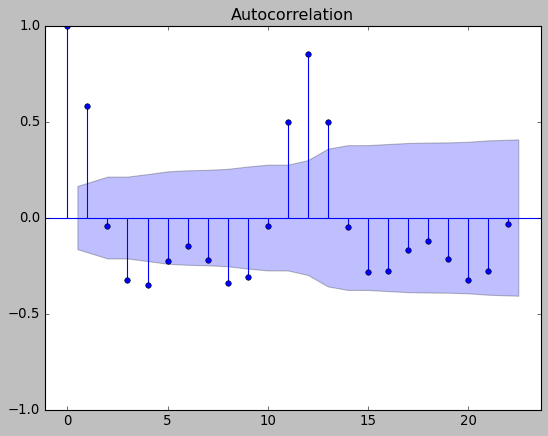

In [73]:
acf_2=plot_acf(df_airline['Lag 2'].dropna())

q = 13

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\graphics\tsaplots.py:348: FutureWarning:

The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.



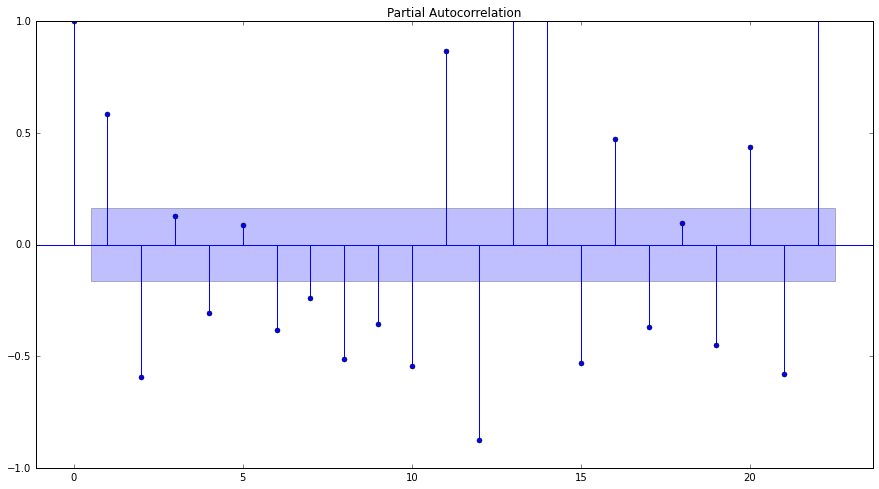

In [89]:
pacf_2=plot_pacf(df_airline['Lag 2'].dropna())

p = 22

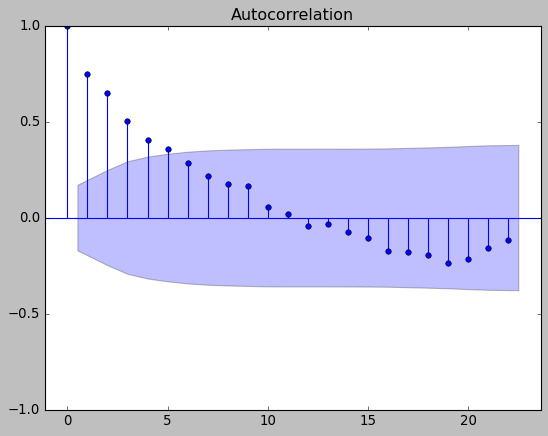

In [71]:
acf_12=plot_acf(df_airline['Lag 12'].dropna())

q = 5

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\graphics\tsaplots.py:348: FutureWarning:

The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.



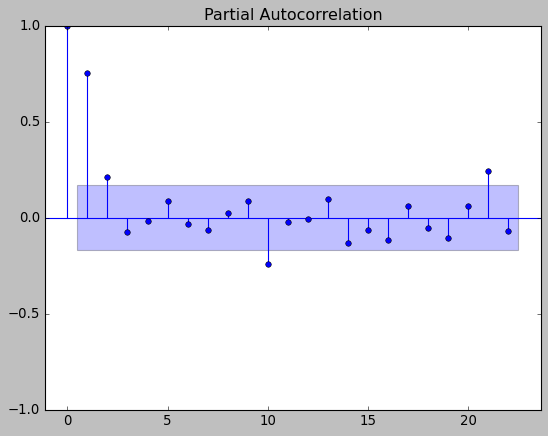

In [75]:
pacf_12=plot_pacf(df_airline['Lag 12'].dropna())

Here in pacf of lag 12, we can see p = 2 or p = 10, we can plot for both and then decide which will work better.


In [78]:
# train test
train_data_end = datetime(1955,12,1)
test_data_end = datetime(1960,12,1)

In [80]:
train_data=df_airline[:train_data_end]
test_data=df_airline[train_data_end+timedelta(days=1):test_data_end]

In [82]:
# prediction
pred_start_date = test_data.index[0]
pred_end_date = test_data.index[-1]

In [84]:
test_data

,Thousands of Passengers,Lag 1,Lag 2,Lag 12
Month,,,,
1956-01-01,284.0,6.0,47.0,42.0
1956-02-01,277.0,-7.0,-1.0,44.0
1956-03-01,317.0,40.0,33.0,50.0
1956-04-01,313.0,-4.0,36.0,44.0
1956-05-01,318.0,5.0,1.0,48.0
1956-06-01,374.0,56.0,61.0,59.0
1956-07-01,413.0,39.0,95.0,49.0
1956-08-01,405.0,-8.0,31.0,58.0
1956-09-01,355.0,-50.0,-58.0,43.0


In [92]:
# ARIMA Model
from statsmodels.tsa.arima.model import ARIMA

In [180]:
ARIMA_model2 = ARIMA(train_data['Thousands of Passengers'],order=(22,2,13))

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.



In [181]:
model_arima_fit=ARIMA_model2.fit()

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning:

Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning:

Non-invertible starting MA parameters found. Using zeros as starting parameters.

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



In [182]:
model_arima_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                  SARIMAX Results                                  
===================================================================================
Dep. Variable:     Thousands of Passengers   No. Observations:                   84
Model:                    ARIMA(22, 2, 13)   Log Likelihood                -298.538
Date:                     Sun, 01 May 2022   AIC                            669.076
Time:                             17:05:28   BIC                            755.718
Sample:                         01-01-1949   HQIC                           703.861
                              - 12-01-1955                                         
Covariance Type:                       opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.3752      1.876     -0.200      0.842      -4.052       3.302
ar.L2         -0.1034      1.052     -0.098      0.922      -2.165       1.958
ar.L3         -0.3429      0.620     -0.553      0.580      -1.559       0.873
ar.L4         -0.3841      0.767     -0.501      0.617      -1.888       1.120
ar.L5          0.0098      0.689      0.014      0.989      -1.340       1.359
ar.L6         -0.1364      0.559     -0.244      0.807      -1.233       0.960
ar.L7         -0.4782      0.582     -0.822      0.411      -1.618       0.662
ar.L8         -0.1408      1.089     -0.129      0.897      -2.275       1.993
ar.L9          0.2554      0.548      0.466      0.641      -0.819       1.330
ar.L10        -0.1327      1.039     -0.128      0.898      -2.170       1.905
ar.L11        -0.1389      0.708     -0.196      0.844      -1.526       1.248
ar.L12         0.4397      0.724      0.608      0.543      -0.979       1.858
ar.L13         0.1890      1.591      0.119      0.905      -2.930       3.308
ar.L14        -0.3230      0.989     -0.326      0.744      -2.262       1.616
ar.L15         0.0782      0.801      0.098      0.922      -1.492       1.648
ar.L16         0.0099      0.663      0.015      0.988      -1.289       1.309
ar.L17        -0.2287      0.708     -0.323      0.747      -1.616       1.158
ar.L18        -0.2114      0.600     -0.352      0.725      -1.388       0.965
ar.L19         0.2109      0.421      0.501      0.616      -0.614       1.036
ar.L20        -0.3285      0.955     -0.344      0.731      -2.200       1.543
ar.L21        -0.4621      0.651     -0.709      0.478      -1.739       0.815
ar.L22        -0.2880      0.918     -0.314      0.754      -2.088       1.511
ma.L1         -0.7851      1.808     -0.434      0.664      -4.329       2.758
ma.L2         -0.3129      1.712     -0.183      0.855      -3.669       3.043
ma.L3          0.1928      1.318      0.146      0.884      -2.390       2.775
ma.L4          0.0883      1.974      0.045      0.964      -3.780       3.957
ma.L5         -0.2509      1.498     -0.167      0.867      -3.187       2.685
ma.L6         -0.0108      0.852     -0.013      0.990      -1.680       1.659
ma.L7          0.4878      1.828      0.267      0.790      -3.096       4.071
ma.L8         -0.6569      2.227     -0.295      0.768      -5.021       3.707
ma.L9         -0.1281      1.798     -0.071      0.943      -3.653       3.397
ma.L10         0.1710      0.941      0.182      0.856      -1.673       2.015
ma.L11         0.0776      1.451      0.053      0.957      -2.767       2.922
ma.L12         0.3816      1.115      0.342      0.732      -1.803       2.566
ma.L13        -0.2064      1.026     -0.201      0.841      -2.218       1.805
sigma2        58.3243     73.664      0.792      0.428     -86.054     202.702
===================================================================================
Ljung-Box (L1) (Q):            

In [183]:
pred2=model_arima_fit.predict(start=pred_start_date,end=pred_end_date)
residuals=test_data['Thousands of Passengers']-pred2

<AxesSubplot:xlabel='Month'>

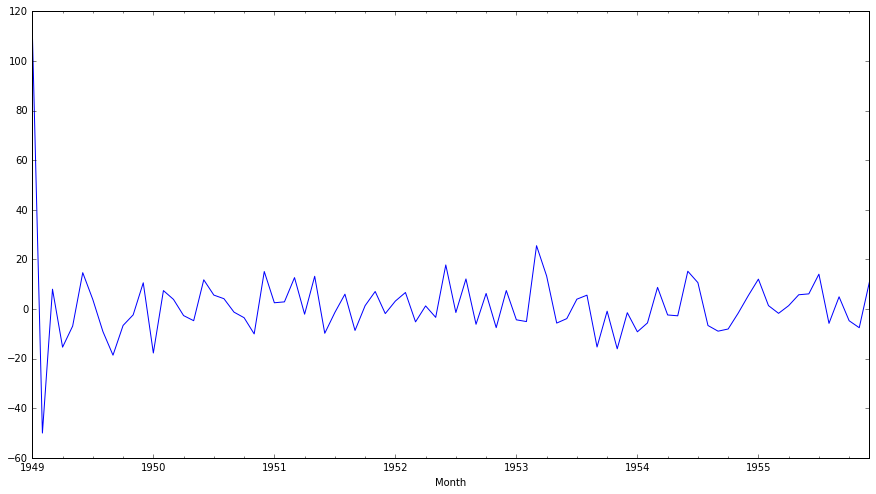

In [184]:
model_arima_fit.resid.plot()

In [185]:
test2=pd.concat([test_data,pd.DataFrame(pred2)],axis=1)

In [173]:
test2

,Thousands of Passengers,Lag 1,Lag 2,Lag 12,predicted_mean
1956-01-01,284.0,6.0,47.0,42.0,281.338720
1956-02-01,277.0,-7.0,-1.0,44.0,276.381629
1956-03-01,317.0,40.0,33.0,50.0,284.758281
1956-04-01,313.0,-4.0,36.0,44.0,297.621301
1956-05-01,318.0,5.0,1.0,48.0,296.073778
1956-06-01,374.0,56.0,61.0,59.0,341.579828
1956-07-01,413.0,39.0,95.0,49.0,390.287087
1956-08-01,405.0,-8.0,31.0,58.0,366.900409
1956-09-01,355.0,-50.0,-58.0,43.0,341.126226
1956-10-01,306.0,-49.0,-99.0,32.0,302.593913


In [186]:
px.line(test2)

As model not working that much good, we will try SARIMAX

In [187]:
from statsmodels.tsa.statespace.sarimax import SARIMAX

In [223]:
model_Sarimax=SARIMAX(train_data['Thousands of Passengers'],order=(10,0,5),seasonal_order=(0,1,0,12))

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.



In [224]:
model_Sarimax_fit=model_Sarimax.fit()

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning:

Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning:

Non-invertible starting MA parameters found. Using zeros as starting parameters.

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



In [225]:
model_Sarimax_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                      SARIMAX Results                                       
============================================================================================
Dep. Variable:              Thousands of Passengers   No. Observations:                   84
Model:             SARIMAX(10, 0, 5)x(0, 1, [], 12)   Log Likelihood                -263.010
Date:                              Sun, 01 May 2022   AIC                            558.021
Time:                                      17:38:24   BIC                            594.448
Sample:                                  01-01-1949   HQIC                           572.522
                                       - 12-01-1955                                         
Covariance Type:                                opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.1293      0.587     -0.220      0.826      -1.280       1.021
ar.L2         -0.0016      0.564     -0.003      0.998      -1.107       1.104
ar.L3         -0.4337      0.523     -0.830      0.407      -1.458       0.591
ar.L4          0.0833      0.615      0.135      0.892      -1.123       1.289
ar.L5          0.2657      0.588      0.452      0.652      -0.888       1.419
ar.L6          0.5999      0.607      0.989      0.323      -0.589       1.789
ar.L7          0.1315      0.204      0.643      0.520      -0.269       0.532
ar.L8          0.0826      0.196      0.421      0.674      -0.302       0.467
ar.L9          0.3249      0.223      1.454      0.146      -0.113       0.763
ar.L10        -0.0673      0.236     -0.286      0.775      -0.529       0.395
ma.L1          0.9456      0.718      1.316      0.188      -0.462       2.354
ma.L2          0.8941      0.655      1.365      0.172      -0.389       2.178
ma.L3          1.1343      0.813      1.395      0.163      -0.459       2.728
ma.L4          0.8861      0.792      1.119      0.263      -0.666       2.438
ma.L5          0.6898      0.842      0.819      0.413      -0.960       2.340
sigma2        80.0424     57.539      1.391      0.164     -32.732     192.817
===================================================================================
Ljung-Box (L1) (Q):                   0.04   Jarque-Bera (JB):                 3.44
Prob(Q):                              0.85   Prob(JB):                         0.18
Heteroskedasticity (H):               1.95   Skew:                             0.51
Prob(H) (two-sided):                  0.11   Kurtosis:                         2.67
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [226]:
pred12=model_Sarimax_fit.predict(start=pred_start_date,end=pred_end_date)
residuals12=test_data['Thousands of Passengers']-pred12

<AxesSubplot:xlabel='Month'>

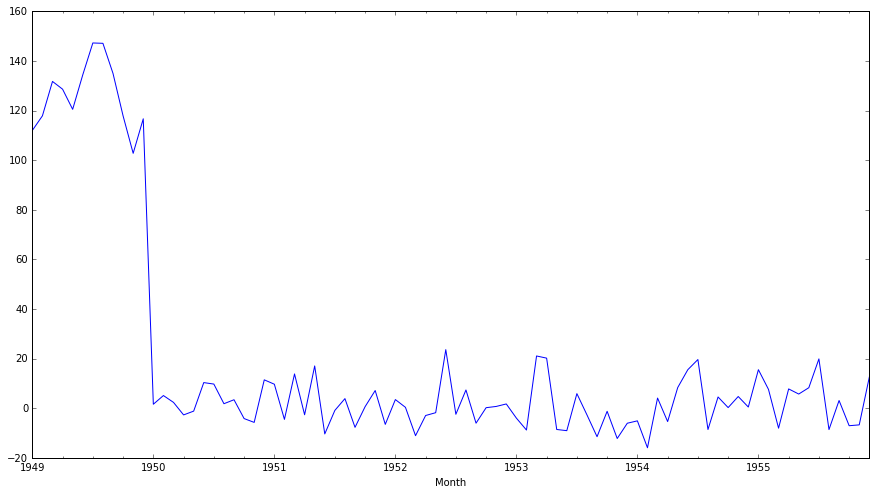

In [227]:
model_Sarimax_fit.resid.plot()

In [228]:
test12=pd.concat([test_data,pd.DataFrame(pred12)],axis=1)

In [230]:
px.line(test12[['Thousands of Passengers','predicted_mean']])